<a href="https://colab.research.google.com/github/flaviorv/ml_classification/blob/main/classification_tp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from types import GenericAlias
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.svm import SVC

# Question 1

# loading titanic dataset
titanic_df = pd.read_csv('http://raw.githubusercontent.com/cassiusf/datasets/refs/heads/main/titanic_data.csv')

# dropping columns
dataset = titanic_df.drop(['Name', 'Ticket', 'PassengerId', 'Cabin'], axis=1)

# removing rows with missing data
dataset = dataset.dropna()

# dividing between features and target
y = dataset.pop('Survived')
x = dataset

# dividing between train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, stratify=y, random_state=42)

# dividing between nominal vars and numeric vars
numeric_vars = ['Age', 'SibSp', 'Parch', 'Fare', 'Pclass']
nominal_vars = ['Sex', 'Embarked']

# applying label encoder in nominal variables
for var in nominal_vars:
  le = LabelEncoder()
  x_train[var] = le.fit_transform(x_train[var])
  x_test[var] = le.transform(x_test[var])

# applying minmax scaler in numeric vars
se = RobustScaler()
x_train[numeric_vars] = se.fit_transform(x_train[numeric_vars])
x_test[numeric_vars] = se.transform(x_test[numeric_vars])

In [29]:
# Question 1 and 3

# aplying svm
params = {'C': [0.01, 0.1, 10, 1000, 2000], 'class_weight': ['balanced', None]}
params2 = {'gamma' :[0.0001, 0.001, 0.4, 10]}
params2.update(params)


linear = SVC(kernel='linear')
rbf = SVC(kernel='rbf')
sigmoid  = SVC(kernel='sigmoid')

# grid search to find the best hyperparam C of each model
models = {'linear': linear, 'rbf': rbf, 'sigmoid': sigmoid}
print('Best models')
best_estimators = {}
metric = 'f1_macro'

for name, model in models.items():
  _params = params2
  if name == 'linear':
    _params = params
  grid = GridSearchCV(model, _params, scoring=metric, cv=5)
  grid.fit(x_train, y_train)

  results = grid.cv_results_
  best_model_index = list(results['rank_test_score']).index(1)
  best_params = results['params'][best_model_index]
  best_score = results['mean_test_score'][best_model_index]
  print(f'Model: {name}, params: {best_params}, {metric}: {round(best_score, 3)}')

  best_estimators[name] = grid.best_estimator_

Best models
Model: linear, params: {'C': 0.1, 'class_weight': 'balanced'}, f1_macro: 0.768
Model: rbf, params: {'C': 10, 'class_weight': None, 'gamma': 0.4}, f1_macro: 0.783
Model: sigmoid, params: {'C': 1000, 'class_weight': 'balanced', 'gamma': 0.0001}, f1_macro: 0.768


LINEAR 
Accuracy: 0.775
           Non-Survivors  Survivors
precision       0.794643   0.742424
recall          0.839623   0.680556
f1-score        0.816514   0.710145


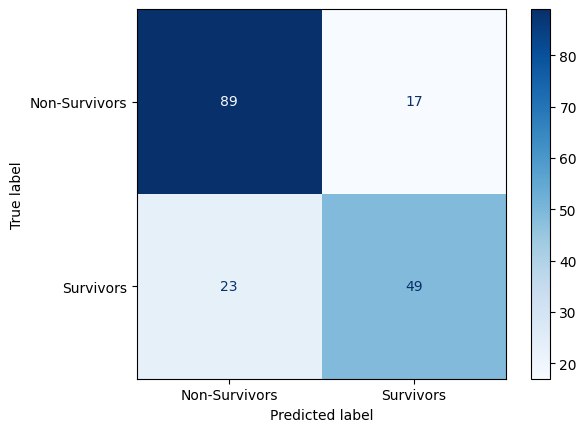

RBF 
Accuracy: 0.792
           Non-Survivors  Survivors
precision       0.800000   0.777778
recall          0.867925   0.680556
f1-score        0.832579   0.725926


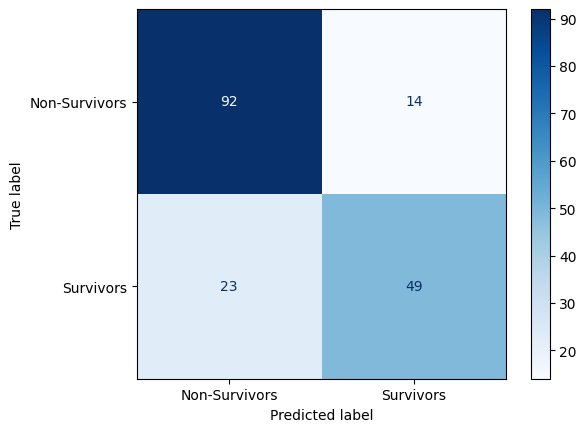

SIGMOID 
Accuracy: 0.775
           Non-Survivors  Survivors
precision       0.794643   0.742424
recall          0.839623   0.680556
f1-score        0.816514   0.710145


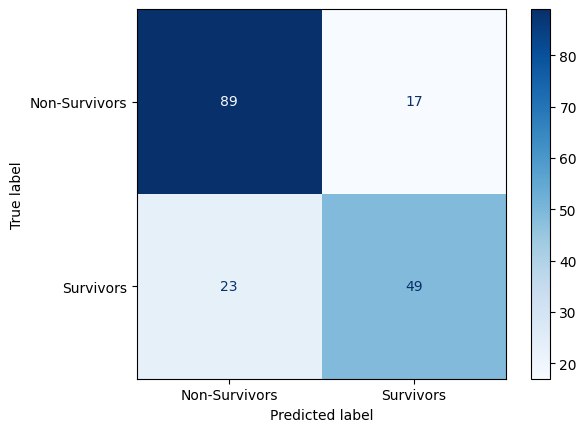

In [30]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Question 2 and 3

# predicting hold-out data and getting the results
labels = ['Non-Survivors', 'Survivors']
results = {}

for name, model in best_estimators.items():
  y_pred = model.predict(x_test)

  # accuracy, f1-score, recall, precision
  result = classification_report(y_test, y_pred, zero_division=0, target_names=labels, output_dict=True)
  print(name.upper(), '\nAccuracy:', round(result['accuracy'], 3))
  print(pd.DataFrame(result)[labels].drop('support', axis=0))

  results[name] = result['macro avg']

  # confusion matrix
  cm = confusion_matrix(y_test, y_pred)
  display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  display.plot(cmap=plt.cm.Blues)
  plt.show()

In [31]:
# Qustion 4

best_model = {}
cr_metric = 'precision'
for name, metric in results.items():
  _metric = round(metric[cr_metric], 2)
  print(name.upper(), _metric)
  if not best_model:
    best_model[name] = _metric
  elif (_metric > best_model[list(best_model.keys())[0]]):
    best_model = {name: _metric}
  elif (_metric == best_model[list(best_model.keys())[0]]):
    best_model = {list(best_model.keys())[0] + ', ' + name: _metric}

print('Best model:', list(best_model.keys())[0].upper())


LINEAR 0.77
RBF 0.79
SIGMOID 0.77
Best model: RBF
